In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np
import os
import glob
from shapely import geometry
import matplotlib.pyplot as plt
import ast
from shapely.geometry import Polygon

## First Try

In [8]:
#data = pd.read_csv("../data/raw/Zeitreihen/Locations_00.csv")
data = pd.read_csv(os.path.join(os.path.dirname("__file__"), "../data/raw/Locations_00.csv"))

In [9]:
data.head()

,Day,Time,X,Y,Z
0,1,8.803567,5.816002,-9.690000,-9.394993
1,1,8.805238,3.516495,-8.933346,-9.422941
2,1,8.806909,-0.490780,-8.933345,-9.471653
3,1,8.808579,-4.501156,-8.933346,-9.520397
4,1,8.810254,-8.520811,-8.933346,-9.569262


In [110]:
data["hour"] = data["Time"].astype(int)
data["minute"] = (60 * (data["Time"]-data["hour"])).astype(int)
data["seconds"] = (60*((60 * (data["Time"]-data["hour"])) - data["minute"])).astype(int)



In [111]:
data["timeseries"] = pd.to_datetime(data["hour"].astype(str) + ':' + data["minute"].astype(str) + ':' + data["seconds"].astype(str), format="%H:%M:%S")
#data["timeseries"] = pd.to_datetime(data["Day_name"].astype(str) + " " + data["hour"].astype(str) + ':' + data["minute"].astype(str) + ':' + data["seconds"].astype(str), format="%a %H:%M:%S")

data.head()

,Day,Time,X,Y,Z,Day_name,hour,minute,seconds,timeseries
0,1,8.900010,-0.410000,-7.217000,-8.120000,Tue,8,54,0,1900-01-01 08:54:00
1,1,8.901722,-0.912195,-6.359423,-9.059900,Tue,8,54,6,1900-01-01 08:54:06
2,1,8.903437,-2.666780,-6.366762,-12.617724,Tue,8,54,12,1900-01-01 08:54:12
3,1,8.905137,-1.125336,-6.381155,-15.999400,Tue,8,54,18,1900-01-01 08:54:18
4,1,8.906867,1.372597,-6.392756,-18.155860,Tue,8,54,24,1900-01-01 08:54:24


In [23]:
df = pd.read_csv("../data/preprocessed/Locations_00_prep.csv", index_col=0)
df.head()

,Day,Time,X,Y,Z,Day_name,hour,minute,seconds,timeseries
0,1,8.900010,-0.410000,-7.217000,-8.120000,Tue,8,54,0,1900-01-01 08:54:00
1,1,8.901722,-0.912195,-6.359423,-9.059900,Tue,8,54,6,1900-01-01 08:54:06
2,1,8.903437,-2.666780,-6.366762,-12.617724,Tue,8,54,12,1900-01-01 08:54:12
3,1,8.905137,-1.125336,-6.381155,-15.999400,Tue,8,54,18,1900-01-01 08:54:18
4,1,8.906867,1.372597,-6.392756,-18.155860,Tue,8,54,24,1900-01-01 08:54:24


In [24]:
type(df["hour"][1])

numpy.int64

In [25]:
# Convert the columns to a common data type
df['hour'] = df['hour'].astype('int')
df['minute'] = df['minute'].astype('int')
df['seconds'] = df['seconds'].astype('int')

# Combine the columns into a single string
df['time_new'] = df['hour'].astype('str') + ':' + df['minute'].astype('str') + ':' + df['seconds'].astype('str')

In [26]:
df.columns = map(str.lower, df.columns)
df.head()

,day,time,x,y,z,day_name,hour,minute,seconds,timeseries,time_new
0,1,8.900010,-0.410000,-7.217000,-8.120000,Tue,8,54,0,1900-01-01 08:54:00,8:54:0
1,1,8.901722,-0.912195,-6.359423,-9.059900,Tue,8,54,6,1900-01-01 08:54:06,8:54:6
2,1,8.903437,-2.666780,-6.366762,-12.617724,Tue,8,54,12,1900-01-01 08:54:12,8:54:12
3,1,8.905137,-1.125336,-6.381155,-15.999400,Tue,8,54,18,1900-01-01 08:54:18,8:54:18
4,1,8.906867,1.372597,-6.392756,-18.155860,Tue,8,54,24,1900-01-01 08:54:24,8:54:24


In [42]:
df = df[["day", "time", "time_new", "day_name", "x", "y", "z"]]
df.head()

,day,time,time_new,day_name,x,y,z
0,1,8.900010,8:54:0,Tue,-0.410000,-7.217000,-8.120000
1,1,8.901722,8:54:6,Tue,-0.912195,-6.359423,-9.059900
2,1,8.903437,8:54:12,Tue,-2.666780,-6.366762,-12.617724
3,1,8.905137,8:54:18,Tue,-1.125336,-6.381155,-15.999400
4,1,8.906867,8:54:24,Tue,1.372597,-6.392756,-18.155860


In [43]:
df_1 = df.loc[df["day"]==1]

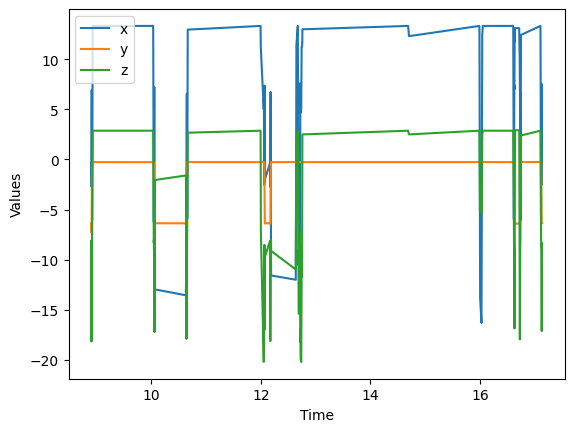

In [46]:
# Extract data
x = df_1['time']
y1 = df_1['x']
y2 = df_1['y']
y3 = df_1['z']

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the data
ax.plot(x, y1, label='x')
ax.plot(x, y2, label='y')
ax.plot(x, y3, label='z')

# Add axis labels and legend
ax.set_xlabel('Time')
ax.set_ylabel('Values')
ax.legend()

# Show the plot
plt.show()


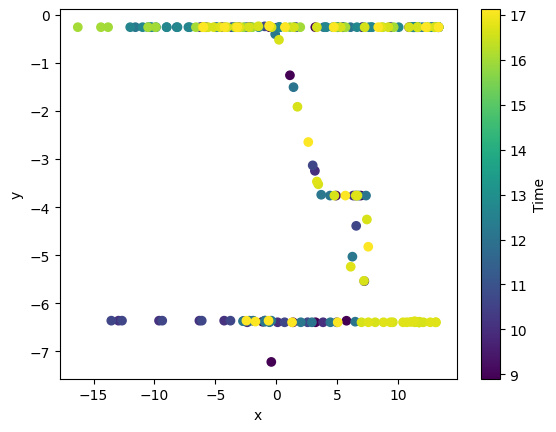

In [56]:
# Extract data
x = df_1['time']
y1 = df_1['x']
y2 = df_1['y']
y3 = df_1['z']

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the data as a scatter plot
scatter = ax.scatter(y1, y2, c=x, cmap='viridis')

# Add a colorbar
cb = plt.colorbar(scatter)
cb.set_label('Time')

# Add axis labels
ax.set_xlabel('x')
ax.set_ylabel('y')

# Show the plot
plt.show()

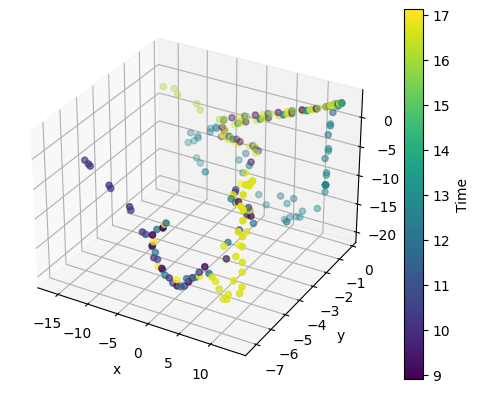

In [62]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Extract data
x = df_1['time']
y1 = df_1['x']
y2 = df_1['y']
y3 = df_1['z']

# Create a figure and axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data as a 3D scatter plot
scatter = ax.scatter(y1, y2, y3, c=x, cmap='viridis')

# Add a colorbar
cb = plt.colorbar(scatter)
cb.set_label('Time')

# Add axis labels
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# Show the plot
plt.show()


In [59]:
df.head()

,day,time,time_new,day_name,x,y,z
0,1,8.900010,8:54:0,Tue,-0.410000,-7.217000,-8.120000
1,1,8.901722,8:54:6,Tue,-0.912195,-6.359423,-9.059900
2,1,8.903437,8:54:12,Tue,-2.666780,-6.366762,-12.617724
3,1,8.905137,8:54:18,Tue,-1.125336,-6.381155,-15.999400
4,1,8.906867,8:54:24,Tue,1.372597,-6.392756,-18.155860


In [60]:
#df.to_csv("../data/preprocessed/Locations_00_model.csv")

In [91]:
# Calculate no movement positions in a one minute interval
df = pd.read_csv("../data/preprocessed/Locations_00_model.csv", index_col=0)


In [92]:
duration = df["time"][1] - df["time"][0]

print(duration*60)

0.1027199999999695


In [125]:
folder_path = '../data/raw/Zeitreihen/'

# Get a list of all the CSV files in the folder
csv_files = glob.glob(os.path.join(folder_path, '*.csv'))
filename = os.path.basename(file)
print(filename)

Locations_20.csv


In [ ]:
for file in csv_files:
    df = pd.read_csv(file)
    # Do something with the DataFrame, for example:
    filename = os.path.splitext(os.path.basename(file))[0]
    print(filename)

In [134]:
file = '../data/raw/Zeitreihen/Locations_01.csv'
df = pd.read_csv(file)
df.columns = df.columns.str.lower()
filename = "Locations_01"
df["no_movement"] =""
day_old = 0
week_number = 0

df["hour"] = df["time"].astype(int)
df["minute"] = (60 * (df["time"]-df["hour"])).astype(int)
df["seconds"] = (60*((60 * (df["time"]-df["hour"])) - df["minute"])).astype(int)

# Convert the columns to a common data type
df['hour'] = df['hour'].astype('int')
df['minute'] = df['minute'].astype('int')
df['seconds'] = df['seconds'].astype('int')

# Combine the columns into a single string
df['time_new'] = df['hour'].astype('str') + ':' + df['minute'].astype('str') + ':' + df['seconds'].astype('str')

df["day_name"] = ""

for i in range(len(df)):
    if(df["day"][i]%5 == 0):
        df.loc[i, "day_name"] = "Mon"
    elif(df["day"][i]%5 == 1):
        df.loc[i, "day_name"] = "Tue"
    elif(df["day"][i]%5 == 2):
        df.loc[i, "day_name"] = "Wed"
    elif(df["day"][i]%5 == 3):
        df.loc[i, "day_name"] = "Thu"
    elif(df["day"][i]%5 == 4):
        df.loc[i, "day_name"] = "Fri"

    # static boolean
    if(i == len(df)-1):
        print(i)
        break;
    duration = (df["time"][i+1] - df["time"][i]) * 60
    if (duration >= 2):
        df.loc[i, "no_movement"] = True
    
    #Add weeks
    day_new = df["day"][i]%5
    # letzte größer gleich als aktuelles -> week number++
    if(day_new<day_old):
        week_number = week_number + 1
    day_old = df["day"][i]%5
    df.loc[df.index == i, 'week_num'] = week_number

df.columns = df.columns.str.lower()
df = df[["day", "time", "time_new", "day_name", "week_num", "x", "y", "z", "no_movement"]]
df.to_csv("../data/preprocessed/" + filename + "_prep.csv", index=False)
        

50908


In [99]:
df.head()

,day,time,time_new,day_name,x,y,z,no_movement
0,1,8.900010,8:54:0,Tue,-0.410000,-7.217000,-8.120000,
1,1,8.901722,8:54:6,Tue,-0.912195,-6.359423,-9.059900,
2,1,8.903437,8:54:12,Tue,-2.666780,-6.366762,-12.617724,
3,1,8.905137,8:54:18,Tue,-1.125336,-6.381155,-15.999400,
4,1,8.906867,8:54:24,Tue,1.372597,-6.392756,-18.155860,


In [100]:
df_still = df.loc[df["no_movement"] == True]

In [101]:
df_still.head()

,day,time,time_new,day_name,x,y,z,no_movement
17,1,8.929433,8:55:45,Tue,13.320000,-0.259423,2.870000,True
37,1,10.066065,10:3:57,Tue,-12.958046,-6.359423,-2.047338,True
57,1,10.664203,10:39:51,Tue,12.949204,-0.259423,2.672439,True
61,1,11.999394,11:59:57,Tue,11.017930,-0.259423,-7.176246,True
76,1,12.076290,12:4:34,Tue,-1.911159,-6.359423,-9.659248,True


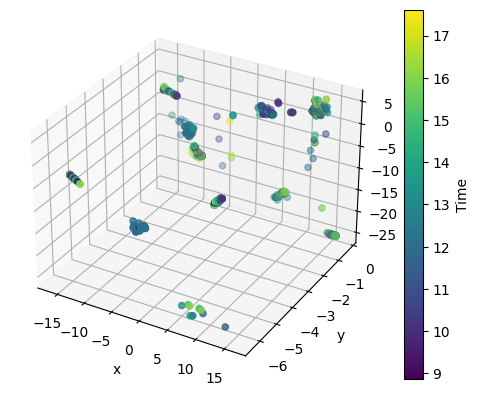

In [102]:
# Extract data
x = df_still['time']
y1 = df_still['x']
y2 = df_still['y']
y3 = df_still['z']

# Create a figure and axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data as a 3D scatter plot
scatter = ax.scatter(y1, y2, y3, c=x, cmap='viridis')

# Add a colorbar
cb = plt.colorbar(scatter)
cb.set_label('Time')

# Add axis labels
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# Show the plot
plt.show()

In [27]:
df = pd.read_csv("../data/preprocessed/Locations_01_prep.csv")
df.columns = df.columns.str.lower()
df = df.loc[df["day_new"]==0]
df = df.loc[df["no_movement"]==True]
print(len(df))
x = df[['day', 'time']]
y = df[['x', 'y', 'z']]
df.head()

618


,day,time,time_new,day_new,week_num,x,y,z,no_movement
15,0,8.041851,8:2:30,0,0.0,7.530777,-0.259423,1.721739,True
32,0,9.414395,9:24:51,0,0.0,7.032547,-0.259423,0.338336,True
48,0,9.952124,9:57:7,0,0.0,7.557522,-0.259423,1.703552,True
66,0,10.622118,10:37:19,0,0.0,11.935354,-6.392756,1.452248,True
85,0,11.605695,11:36:20,0,0.0,7.687937,-0.259423,1.614870,True


In [ ]:
df_1 = df[df["Week_num"]== 0]
positions_week_1 = week_1 = df_1[['X', 'Y', 'Z']]

df_2 = df[df["Week_num"]== 1]
positions_week_2 = week_2 = df_2[['X', 'Y', 'Z']]
correlation_matrix = np.corrcoef(positions_week_1, positions_week_2)
print(correlation_matrix)
#sns.heatmap(correlation_matrix)

## Main Events

In [2]:
df = pd.read_csv("../data/preprocessed/v2/Locations_00_prep_v2.csv", index_col = 0)
df.head()

,day,time,x,y,z,hour,minute,time_new,day_new,week_num,no_movement_5min,no_movement_15min,datetime
0,1,8.803567,5.816002,-9.690000,-9.394993,8,48,08:48:00,1,0.0,0.0,0.0,2023-01-02 08:48:00
1,1,8.805238,3.516495,-8.933346,-9.422941,8,48,08:48:00,1,0.0,0.0,0.0,2023-01-02 08:48:00
2,1,8.806909,-0.490780,-8.933345,-9.471653,8,48,08:48:00,1,0.0,0.0,0.0,2023-01-02 08:48:00
3,1,8.808579,-4.501156,-8.933346,-9.520397,8,48,08:48:00,1,0.0,0.0,0.0,2023-01-02 08:48:00
4,1,8.810254,-8.520811,-8.933346,-9.569262,8,48,08:48:00,1,0.0,0.0,0.0,2023-01-02 08:48:00


In [5]:
df = df.loc[df["no_movement_15min"] == 1]


1259

In [6]:
df["y_binary"] = ""
df.loc[(df["y"] >= -1) & (df["y"] <= 0), "y_binary"] = 1
df.loc[(df["y"] >= -10) & (df["y"] <= -6), "y_binary"] = 0
df = df.loc[df["y_binary"].isin([0, 1])]

In [7]:
df = pd.read_csv("../data/raw_old/" + Locations + ".csv")
len(df)

120

In [ ]:
import numpy as np

folder_path = '../data/preprocessed/v2/'
csv_files = glob.glob(os.path.join(folder_path, '*.csv'))

fig = plt.figure(figsize=(10, 50))

days_of_week = ['Mo', 'Di', 'Mi', 'Do', 'Fr']

for i, csv_file in enumerate(csv_files):
    filename = os.path.splitext(os.path.basename(csv_file))[0]
    df = pd.read_csv(csv_file)
    time_df = df

    week_length = time_df
    weeks = week_length["day_new"].unique()

    # Create an array to store the bar heights for each day
    bar_heights = np.zeros(len(days_of_week))

    # Calculate the bar heights for available days
    for j, day in enumerate(days_of_week):
        if day in weeks:
            bar_heights[j] = len(week_length.loc[week_length["day_new"] == day])

    # Scale bar heights between 0 and 1
    max_height = max(bar_heights)
    scaled_heights = [h / max_height for h in bar_heights]

    # Create the bar plot
    ax = fig.add_subplot(len(csv_files), 1, i+1)
    ax.bar(days_of_week, scaled_heights)

    # Set y-axis limits
    ax.set_ylim(0, 1)

    # Set plot title and labels
    ax.set_title("Verteilung der Zeitpunkte pro Tag - " + filename)
    ax.set_xlabel("Tag")
    ax.set_ylabel("Anzahl Zeitpunkte (skaliert)")

plt.tight_layout()
plt.show()


In [ ]:
folder_path = '../data/preprocessed/v2/'
csv_files = glob.glob(os.path.join(folder_path, '*.csv'))

fig = plt.figure(figsize=(10, 50))

days_of_week = ['Mo', 'Di', 'Mi', 'Do', 'Fr']

for i, csv_file in enumerate(csv_files):
    filename = os.path.splitext(os.path.basename(csv_file))[0]
    df = pd.read_csv(csv_file)
    time_df = df

    week_length = time_df
    weeks = week_length["day_new"].unique()
    week_length = week_length.loc[week_length["day_new"].isin(weeks)]
    bar_heights = [len(week_length.loc[week_length["day_new"] == w]) for w in weeks]

    # Scale bar heights between 0 and 1
    max_height = max(bar_heights)
    scaled_heights = [h / max_height for h in bar_heights]

    # Create the bar plot
    ax = fig.add_subplot(len(csv_files), 1, i+1)
    ax.bar(weeks, scaled_heights)

    ax.set_ylim(0, 1)
    ax.set_xlim(0, 4)

    # Set plot title and labels
    ax.set_title("Verteilung der Zeitpunkte pro Tag - " + "Person: "+str(i))
    ax.set_xlabel("Tag")
    ax.set_ylabel("Anzahl Zeitpunkte")

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.ticker as ticker

folder_path = '../data/preprocessed/v2/'
csv_files = glob.glob(os.path.join(folder_path, '*.csv'))

fig = plt.figure(figsize=(10, 50))

days_of_week = ['Mo', 'Di', 'Mi', 'Do', 'Fr']

for i, csv_file in enumerate(csv_files):
    filename = os.path.splitext(os.path.basename(csv_file))[0]
    df = pd.read_csv(csv_file)
    time_df = df

    week_length = time_df
    weeks = week_length["day_new"].unique()
    week_length = week_length.loc[week_length["day_new"].isin(weeks)]
    bar_heights = [len(week_length.loc[week_length["day_new"] == w]) for w in weeks]

    # Scale bar heights between 0 and 1
    max_height = max(bar_heights)
    scaled_heights = [h / max_height for h in bar_heights]

    # Create the bar plot
    ax = fig.add_subplot(len(csv_files), 1, i+1)
    ax.bar(weeks, scaled_heights)

    ax.set_ylim(0, 1)
    ax.set_xlim(0, 4)

    # Set x-axis tick format to integers
    ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

    # Set plot title and labels
    ax.set_title("Verteilung der Zeitpunkte pro Tag - " + "Person: " + str(i))
    ax.set_xlabel("Tag")
    ax.set_ylabel("Anzahl Zeitpunkte")

plt.tight_layout()
plt.show()


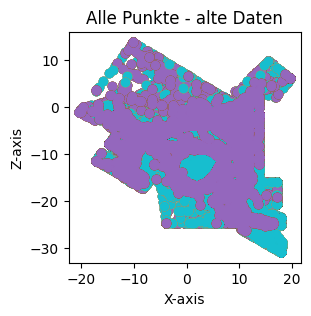

In [7]:
folder_path = '../data/raw_old/'
csv_files = glob.glob(os.path.join(folder_path, '*.csv'))

# Create a single figure for the scatter plot
fig, ax = plt.subplots(figsize=(3, 3))

for i in csv_files:
    filename = os.path.splitext(os.path.basename(i))[0]
    df = pd.read_csv("../data/raw_old/" + filename + ".csv")
    unique_day = [0,1,2,3,4]

    for i, day in enumerate(unique_day):
        df_plot = df
        x = df_plot["X"]
        z = df_plot["Z"]
        ax.scatter(x, z)  

ax.set_xlabel("X-axis")  # Add x-axis label
ax.set_ylabel("Z-axis")  # Add y-axis label
ax.set_title("Alle Punkte - alte Daten")

plt.show()

In [4]:
raeume_df = pd.read_csv("../data/preprocessed/Raumkoordinaten/raumkoordinaten_prep_unity.csv", index_col = 0)

vier_c = raeume_df.loc[raeume_df["floor"].isin([0])]
fuenf_c = raeume_df.loc[raeume_df["floor"].isin([1])]

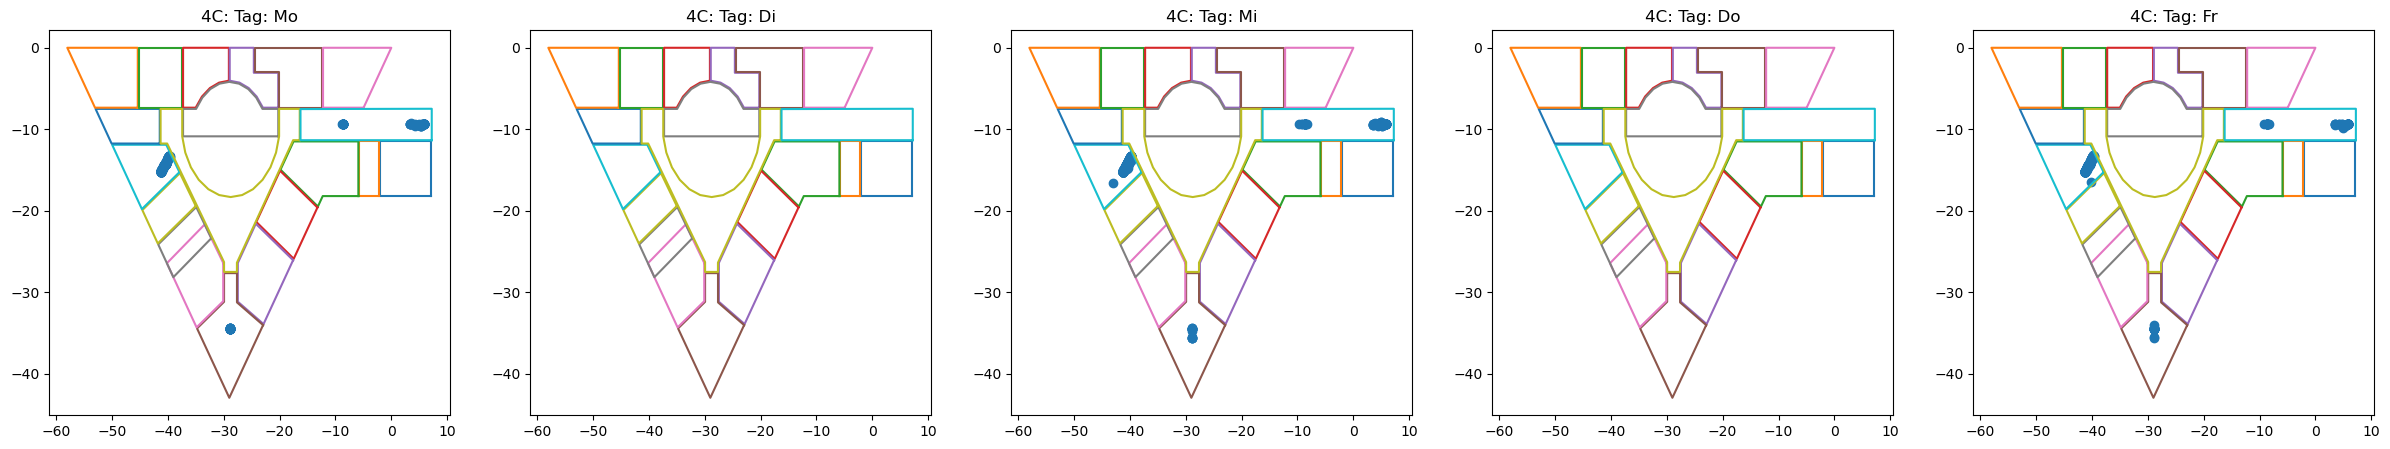

In [7]:

df = pd.read_csv("../data/preprocessed/v2/" + "Locations_05_prep_v2" + ".csv")
df["y_binary"] = ""
unique_day = ["Mo","Di","Mi","Do","Fr"]


fig, axes = plt.subplots(1, 5, figsize=(30, 5))

for i, day in enumerate(unique_day):
    df_plot = df.loc[df["day_new"] == i]
    df_plot = df_plot.loc[df["no_movement_15min"] == 1]
    #df_plot = df_plot.loc[row_indexer,col_indexer] = value instead

    
    df_plot.loc[(df_plot["y"] >= -1) & (df_plot["y"] <= 3), "y_binary"] = 1
    df_plot.loc[(df_plot["y"] >= -12) & (df_plot["y"] <= -1), "y_binary"] = 0
    df_plot = df_plot.loc[df_plot["y_binary"].isin([0])]
    x = df_plot["x"]
    z = df_plot["z"]
    axes[i].scatter(x, z)
    axes[i].set_title(f"4C: Tag: {day}")

    for s, coor in enumerate(vier_c["coor"]):
        room = Polygon(ast.literal_eval(coor))
        axes[i].plot(*room.exterior.xy)
        

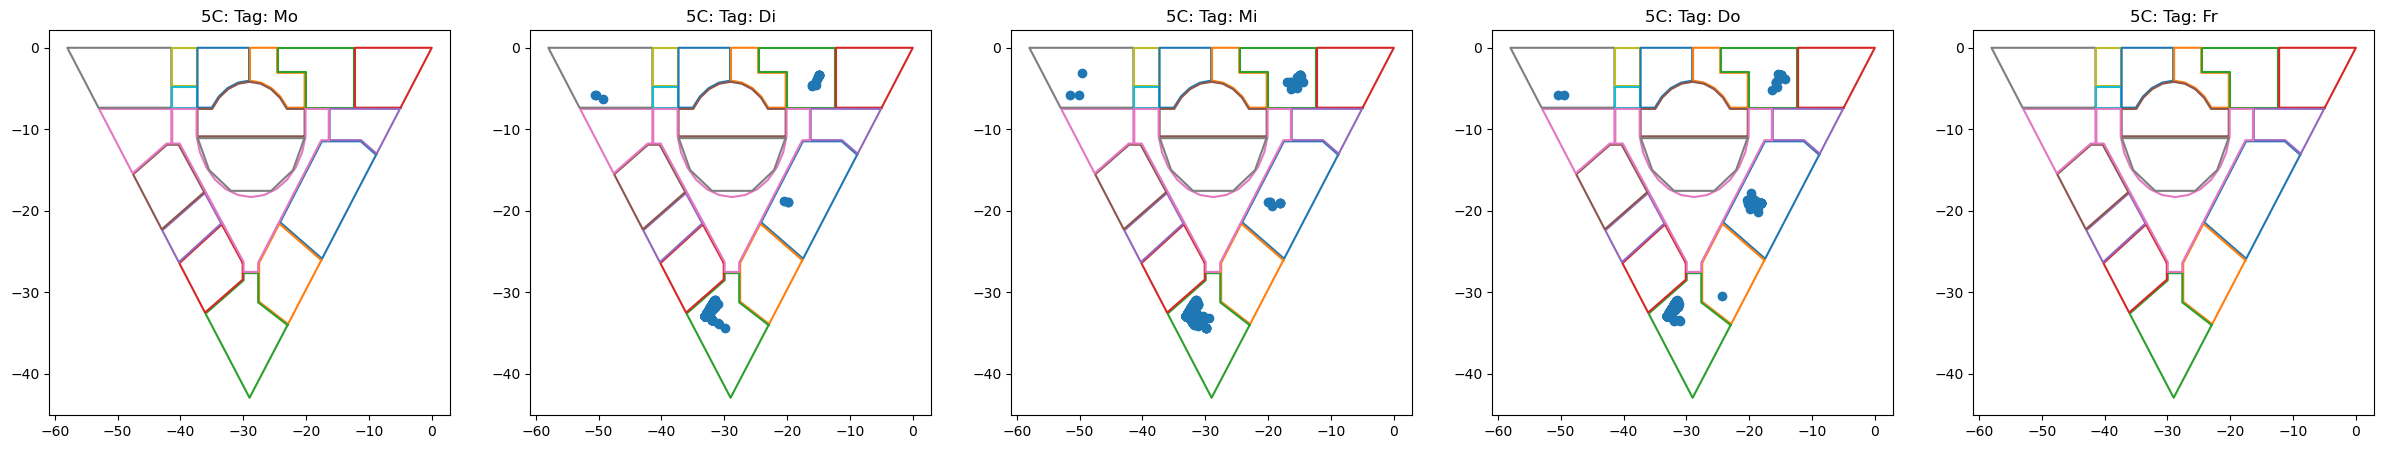

In [10]:
import glob
folder_path = '../data/preprocessed/v2/'
csv_files = glob.glob(os.path.join(folder_path, '*.csv'))

fig, axes = plt.subplots(1, 5, figsize=(30, 5))

#for i in csv_files:
filename = os.path.splitext(os.path.basename(csv_files[0]))[0]
df = pd.read_csv("../data/preprocessed/v2/" + filename + ".csv")
df["y_binary"] = ""
unique_day = ["Mo","Di","Mi","Do","Fr"]

for i, day in enumerate(unique_day):
    df_plot = df.loc[df["day_new"] == i]
    df_plot = df_plot.loc[df["no_movement_15min"] == 1]
    #df_plot = df_plot.loc[row_indexer,col_indexer] = value instead

    
    df_plot.loc[(df_plot["y"] >= -1) & (df_plot["y"] <= 3), "y_binary"] = 1
    df_plot.loc[(df_plot["y"] >= -12) & (df_plot["y"] <= -1), "y_binary"] = 0
    df_plot = df_plot.loc[df_plot["y_binary"].isin([1])]
    x = df_plot["x"]
    z = df_plot["z"]
    axes[i].scatter(x, z)
    axes[i].set_title(f"5C: Tag: {day}")

    for s, coor in enumerate(fuenf_c["coor"]):
        room = Polygon(ast.literal_eval(coor))
        axes[i].plot(*room.exterior.xy)
        

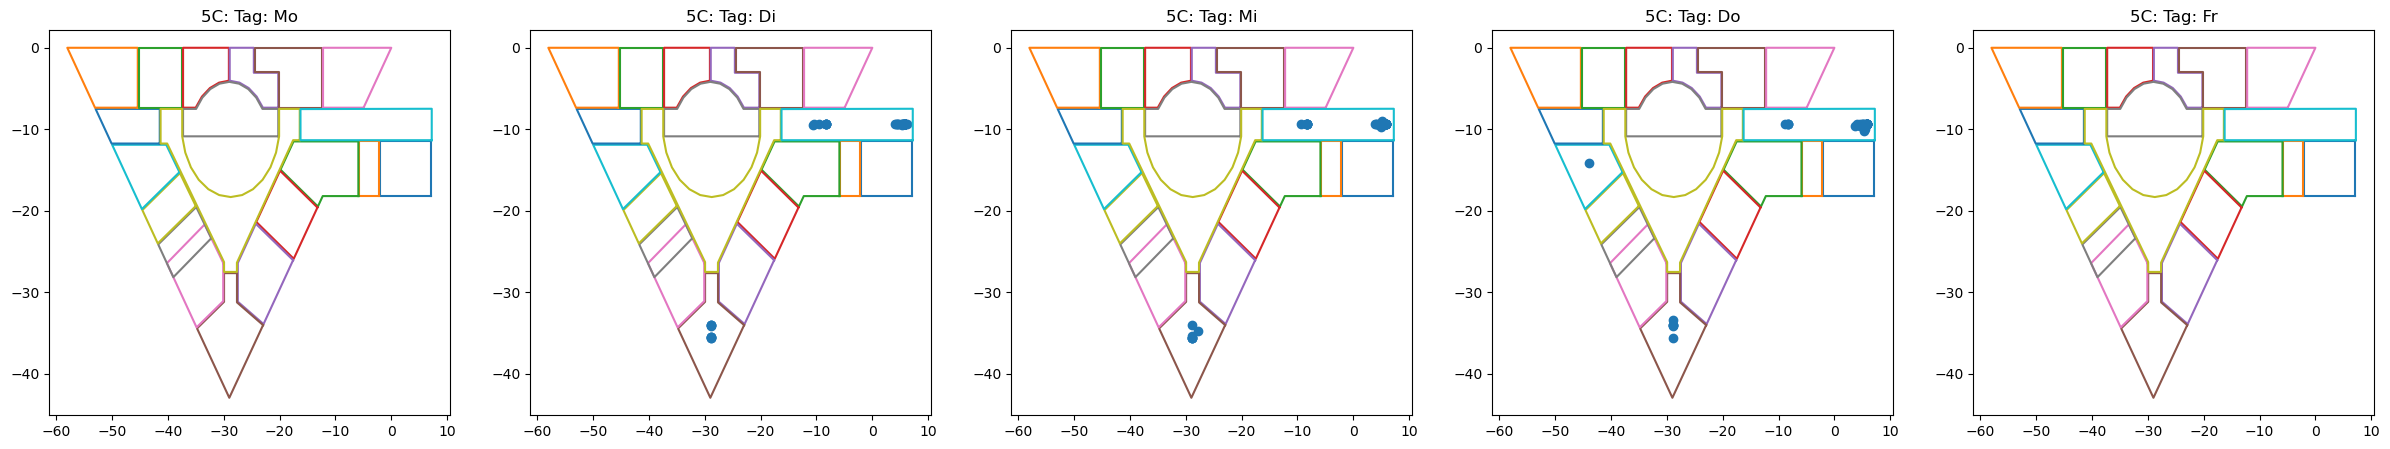

In [11]:
import glob
folder_path = '../data/preprocessed/v2/'
csv_files = glob.glob(os.path.join(folder_path, '*.csv'))

fig, axes = plt.subplots(1, 5, figsize=(30, 5))

#for i in csv_files:
filename = os.path.splitext(os.path.basename(csv_files[0]))[0]
df = pd.read_csv("../data/preprocessed/v2/" + filename + ".csv")
df["y_binary"] = ""
unique_day = ["Mo","Di","Mi","Do","Fr"]

for i, day in enumerate(unique_day):
    df_plot = df.loc[df["day_new"] == i]
    df_plot = df_plot.loc[df["no_movement_15min"] == 1]
    #df_plot = df_plot.loc[row_indexer,col_indexer] = value instead

    
    df_plot.loc[(df_plot["y"] >= -1) & (df_plot["y"] <= 3), "y_binary"] = 1
    df_plot.loc[(df_plot["y"] >= -12) & (df_plot["y"] <= -1), "y_binary"] = 0
    df_plot = df_plot.loc[df_plot["y_binary"].isin([0])]
    x = df_plot["x"]
    z = df_plot["z"]
    axes[i].scatter(x, z)
    axes[i].set_title(f"5C: Tag: {day}")

    for s, coor in enumerate(vier_c["coor"]):
        room = Polygon(ast.literal_eval(coor))
        axes[i].plot(*room.exterior.xy)

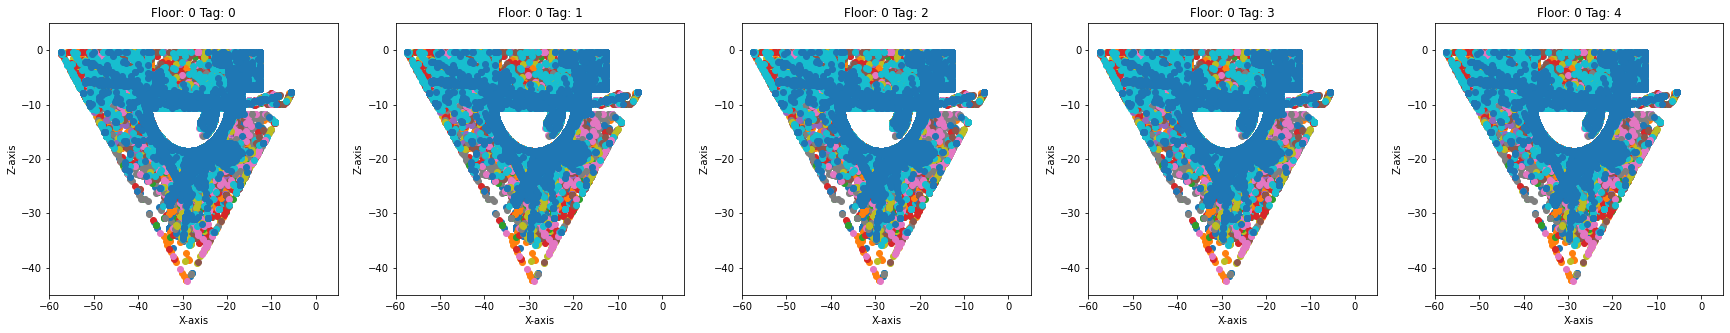

In [20]:
folder_path = '../data/raw/'
csv_files = glob.glob(os.path.join(folder_path, '*.csv'))

fig, axes = plt.subplots(1, 5, figsize=(30, 5))

for f in csv_files:
    filename = os.path.splitext(os.path.basename(f))[0]
    df = pd.read_csv("../data/raw/" + filename + ".csv")#, index_col = 0)
    df.columns = df.columns.str.lower()
    df["y_binary"] = ""
    unique_day = [0,1,2,3,4]

    for i, day in enumerate(unique_day):
        df_plot = df#.loc[df["day_new"] == i]
        #df_plot = df_plot.loc[df["no_movement_15min"] == 1]
        
        df_plot.loc[(df_plot["y"] >= -1) & (df_plot["y"] <= 2), "y_binary"] = 1
        df_plot.loc[(df_plot["y"] >= -10) & (df_plot["y"] < -1), "y_binary"] = 0
        df_plot = df_plot.loc[df_plot["y_binary"].isin([1])]
        x = df_plot["x"]
        z = df_plot["z"]
        
        # Alt
        #axes[i].set_xlim(-25, 20)  
        #axes[i].set_ylim(15, -30)
        
        # Neu
        axes[i].set_xlim(-60, 5)  
        axes[i].set_ylim(-45, 5)
        
        axes[i].scatter(x, z)
        axes[i].set_title(f"Floor: 0 Tag: {i}")
        axes[i].set_xlabel('X-axis')
        axes[i].set_ylabel('Z-axis')

        #for s, coor in enumerate(floor_0["coor"]):
        #    room = Polygon(ast.literal_eval(coor))
        #    axes[i].plot(*room.exterior.xy)


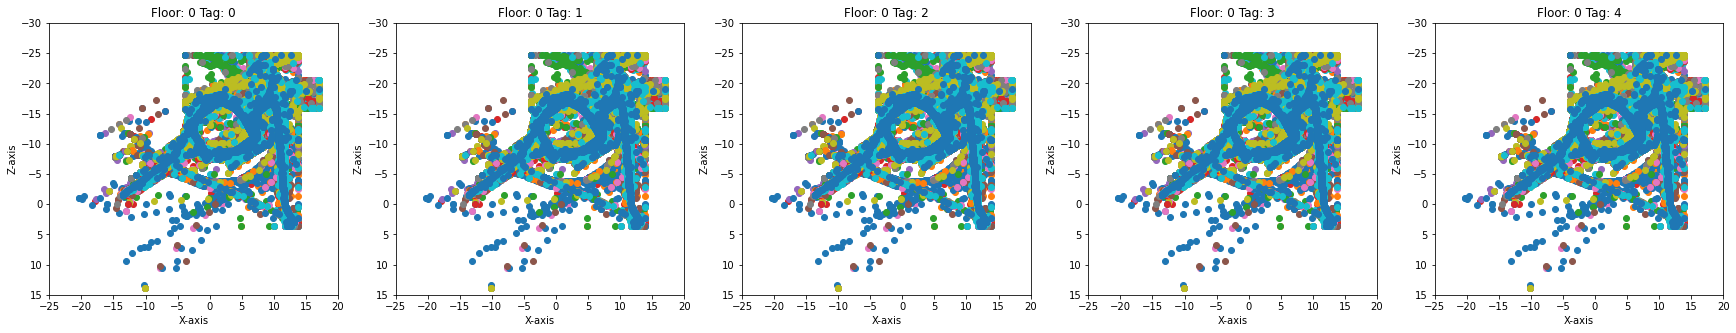

In [14]:
folder_path = '../data/raw_old/'
csv_files = glob.glob(os.path.join(folder_path, '*.csv'))

fig, axes = plt.subplots(1, 5, figsize=(30, 5))

for f in csv_files:
    filename = os.path.splitext(os.path.basename(f))[0]
    df = pd.read_csv("../data/raw_old/" + filename + ".csv")#, index_col = 0)
    df.columns = df.columns.str.lower()
    df["y_binary"] = ""
    unique_day = [0,1,2,3,4]

    for i, day in enumerate(unique_day):
        df_plot = df#.loc[df["day_new"] == i]
        #df_plot = df_plot.loc[df["no_movement_15min"] == 1]
        
        df_plot.loc[(df_plot["y"] >= -1) & (df_plot["y"] <= 2), "y_binary"] = 1
        df_plot.loc[(df_plot["y"] >= -10) & (df_plot["y"] < -1), "y_binary"] = 0
        df_plot = df_plot.loc[df_plot["y_binary"].isin([0])]
        x = df_plot["x"]
        z = df_plot["z"]
        
        # Alt
        axes[i].set_xlim(-25, 20)  
        axes[i].set_ylim(15, -30)
        
        # Neu
        #axes[i].set_xlim(-60, 5)  
        #axes[i].set_ylim(-45, 5)
        
        axes[i].scatter(x, z)
        axes[i].set_title(f"Floor: 0 Tag: {i}")
        axes[i].set_xlabel('X-axis')
        axes[i].set_ylabel('Z-axis')

        #for s, coor in enumerate(floor_0["coor"]):
        #    room = Polygon(ast.literal_eval(coor))
        #    axes[i].plot(*room.exterior.xy)

In [ ]:
folder_path = '../data/raw_old/'
csv_files = glob.glob(os.path.join(folder_path, '*.csv'))

for f in csv_files:
    filename = os.path.splitext(os.path.basename(f))[0]
    df = pd.read_csv("../data/raw_old/" + filename + ".csv")#, index_col = 0)
    df.columns = df.columns.str.lower()
    print(df["y"].min())
    print(df["y"].max())
    print("")

In [17]:
folder_path = '../data/preprocessed/v2/'
csv_files = glob.glob(os.path.join(folder_path, '*.csv'))

dfs = []
for f in csv_files:
    filename = os.path.splitext(os.path.basename(f))[0]
    df = pd.read_csv("../data/preprocessed/v2/" + filename + ".csv", index_col = 0)
    dfs.append(df)

In [69]:
df = pd.read_csv("../data/preprocessed/v2/Locations_01_prep_v2.csv", index_col = 0)
df.min()

day                                    0
time                                 8.0
x                             -57.466682
y                                  -9.69
z                              -42.33334
hour                                   8
minute                                 0
time_new                        08:00:00
day_new                                0
week_num                             0.0
no_movement_5min                     0.0
no_movement_15min                    0.0
datetime             2023-01-01 08:00:00
dtype: object

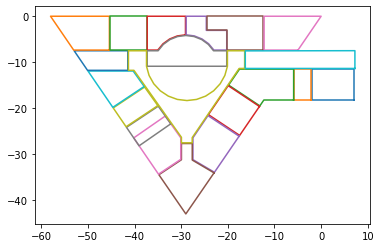

In [38]:
from shapely import geometry
import matplotlib.pyplot as plt
import ast
from shapely.geometry import Polygon

#Raum_5C_01_1 = geometry.Polygon([[8.8548, 13.128], [17.456, 25.879], [24.134, 21.409], [17.483, 11.475], [11.3, 11.475]])

for i, coor in enumerate(vier_c["coor"]):
    room = Polygon(ast.literal_eval(coor))
    plt.plot(*room.exterior.xy)

plt.show()